<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/notebook_2024/Lab07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.ndimage as nd
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')
imgpath = '/content/drive/MyDrive/class/DIP1/DIP4E'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
lap=np.array([[0,1,0],[1,-4,1],[0,1,0]])

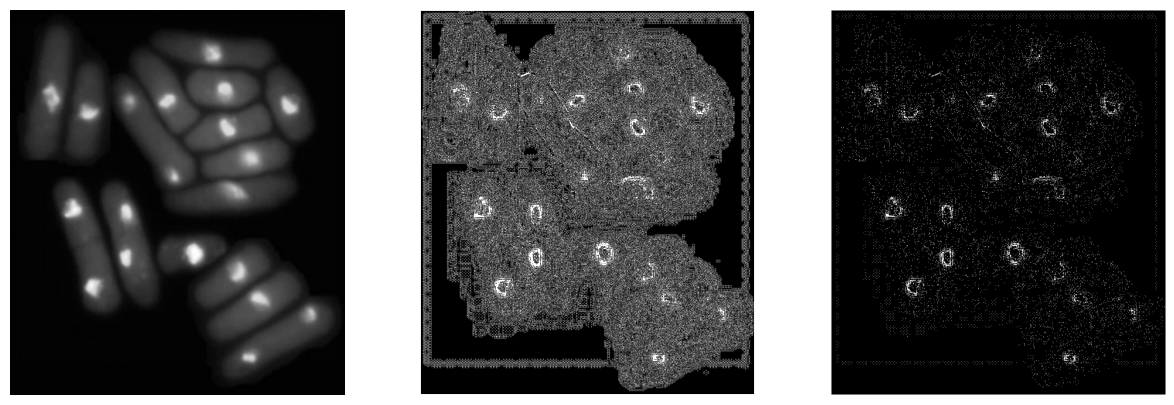

In [4]:
I = Image.open(imgpath+'/yeast-cells.tif')
f = np.array(I)
f_lap = signal.convolve2d(f,lap,'same')
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(np.abs(f_lap),cmap='gray',vmin=0,vmax=4)
plt.axis('off')
plt.subplot(133)
plt.imshow(np.abs(f_lap)>=4,cmap='gray')
plt.axis('off')
plt.show()

## Basic Global Thresholding

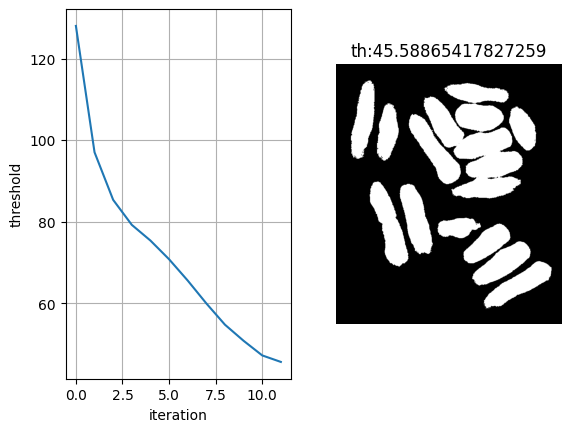

In [5]:
T_init = 128
T = []
T.append(T_init)
dT = 1000
esp = 2
## write down your algorithm
while dT>esp:
  m1 = np.mean(f[f<=T[-1]])
  m2 = np.mean(f[f>T[-1]])
  T.append(0.5*(m1+m2))
  dT = np.abs(T[-1]-T[-2])

bmsk = f>T[-1]
plt.subplot(122)
plt.imshow(bmsk,cmap='gray')
plt.axis('off')
plt.title(f'th:{T[-1]}')
plt.subplot(121)
plt.plot(np.arange(len(T)),T)
plt.xlabel('iteration')
plt.ylabel('threshold')
plt.grid('on')
plt.show()

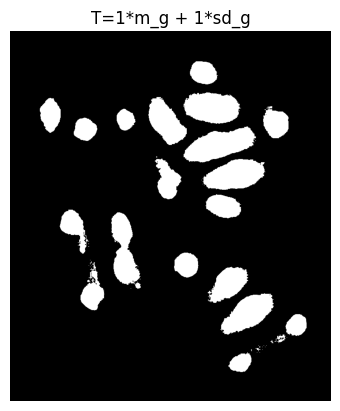

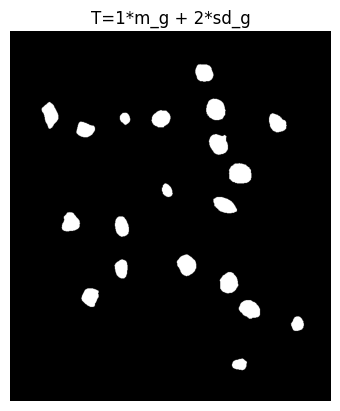

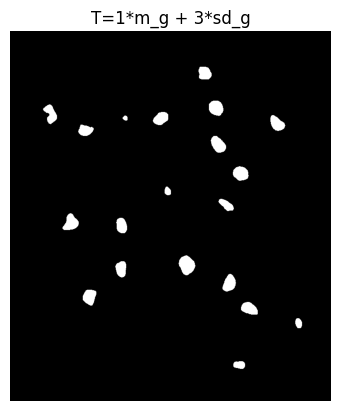

In [6]:
a=1
b_vals=[1,2,3]
for b in b_vals:
  m_g = np.mean(f)
  sd_g = np.std(f)
  T = a*m_g+b*sd_g
  plt.imshow(f>T,cmap='gray')
  plt.axis('off')
  plt.title(f'T={a}*m_g + {b}*sd_g')
  plt.show()

## Using Edges to Improve Global Thresholding

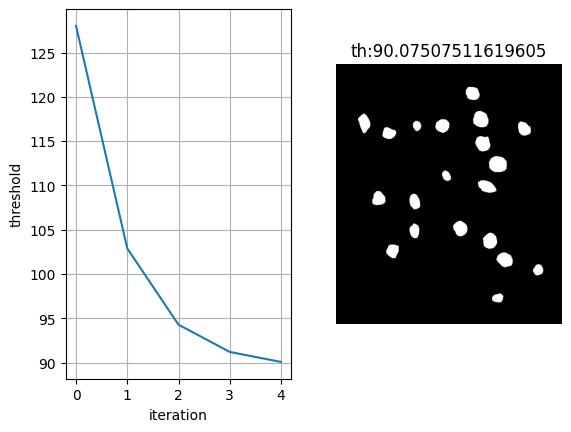

In [7]:
T_init = 128
T = []
T.append(T_init)
dT = 1000
esp = 2
f_msk = f[np.abs(f_lap)>=4]
## write down your algorithm
while dT>esp:
  m1 = np.mean(f_msk[f_msk<=T[-1]])
  m2 = np.mean(f_msk[f_msk>T[-1]])
  T.append(0.5*(m1+m2))
  dT = np.abs(T[-1]-T[-2])

bmsk = f>T[-1]
plt.subplot(122)
plt.imshow(bmsk,cmap='gray')
plt.axis('off')
plt.title(f'th:{T[-1]}')
plt.subplot(121)
plt.plot(np.arange(len(T)),T)
plt.xlabel('iteration')
plt.ylabel('threshold')
plt.grid('on')
plt.show()

## K-means clustering

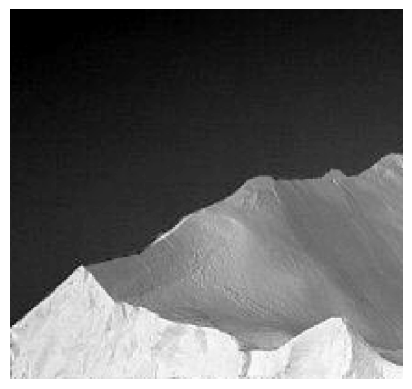

In [8]:
I = Image.open(imgpath+'/iceberg.tif')
f = np.array(I)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.show()

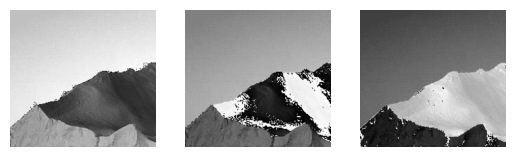

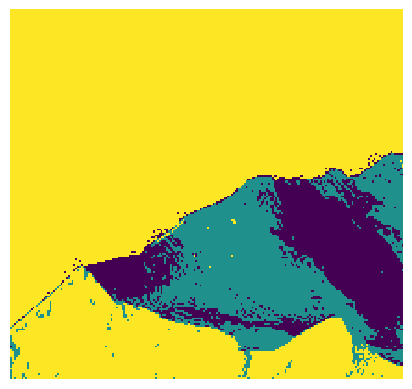

In [9]:
m_vals = [64, 128, 192]
c = np.zeros((f.shape[0],f.shape[1],len(m_vals)))

for i in range(len(m_vals)):
  c[:,:,i] = np.abs(f-m_vals[i])

# distance maps
plt.subplot(131)
plt.imshow(c[:,:,0],vmin=0,vmax=255,cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(c[:,:,1],vmin=0,vmax=255,cmap='gray')
plt.axis('off')
plt.subplot(133)
plt.imshow(c[:,:,2],vmin=0,vmax=255,cmap='gray')
plt.axis('off')
plt.show()

# k-means clustering (1st iteration)
plt.imshow(np.argmin(c,axis=-1),interpolation='nearest')
plt.axis('off')
plt.show()

## Exercise
- 강의노트의 "standard" k-means clustering algorithm을 완성하여 iceberg.tif 및 s01.nii.gz 파일에 적용해보자.
- k=2,3,4 일 때의 결과를 iceberg.tif, s01.nii.gz에 대해 각각 비교해보자.